# Firstly cleaning the data for analysis  

In [1]:
import pandas as pd
import csv
import statistics as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('placement_data2021.xlsx')

In [3]:
df.shape

(579, 7)

In [4]:
df.columns=df.iloc[0]

In [5]:
df=df.drop([0],axis='rows')
df=df.drop('Sr. No.',axis='columns')

In [6]:
df.head()

,Roll No.,Full Name of the Student,Course,Branch,Company Name,CTC in Lakhs per annum
1,1811010,Mayank Ravindra Chowdhary,B.Tech,COMP,Accenture,4.5
2,1811087,Ayush Rajesh Khade,B.Tech,COMP,Accenture,4.5
3,1812028,Nidhi Dinesh Jajda,B.Tech,ETRX,Accenture,4.5
4,1812077,Shravani Manohar Dhote,B.Tech,ETRX,Accenture,4.5
5,1812086,Falguni Shailendra Kumud,B.Tech,ETRX,Accenture,4.5


In [7]:
df.to_csv('Placement_data.csv',index=False)

In [8]:
data=pd.read_csv('Placement_data.csv')

In [9]:
data.head()

,Roll No.,Full Name of the Student,Course,Branch,Company Name,CTC in Lakhs per annum
0,1811010,Mayank Ravindra Chowdhary,B.Tech,COMP,Accenture,4.5
1,1811087,Ayush Rajesh Khade,B.Tech,COMP,Accenture,4.5
2,1812028,Nidhi Dinesh Jajda,B.Tech,ETRX,Accenture,4.5
3,1812077,Shravani Manohar Dhote,B.Tech,ETRX,Accenture,4.5
4,1812086,Falguni Shailendra Kumud,B.Tech,ETRX,Accenture,4.5


In [10]:
data.Course.unique()

array(['B.Tech', 'B. Tech', 'M.Tech'], dtype=object)

In [11]:
for i in range(len(data.Course)):
    if data.Course[i]=='B. Tech':
        data.Course[i]='B.Tech'

In [12]:
data.Course.unique()

array(['B.Tech', 'M.Tech'], dtype=object)

In [13]:
def get_list(a):
    l=[]
    for i in range(578):
        if data.Branch[i]==a:
            l.append(float(data['CTC in Lakhs per annum'][i]))
    return l

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### Sum of package offered to a branch

In [15]:
sum(data['CTC in Lakhs per annum'])

3988.8299999999936

In [16]:
x=[sum(get_list("COMP")),sum(get_list("ETRX")),sum(get_list("EXTC")),sum(get_list("IT")),sum(get_list("MECH"))]
y=data.Branch.unique()
y=y[0:5]

Text(0, 0.5, 'Total sum of package offered in lakhs(Rs)')

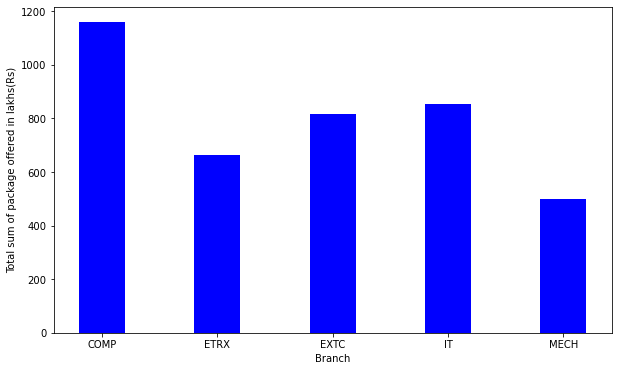

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(y,x,color='blue',width=0.4)
plt.xlabel('Branch')
plt.ylabel('Total sum of package offered in lakhs(Rs)')

### Average package in a branch

In [18]:
x=[stat.mean(get_list("COMP")),stat.mean(get_list("ETRX")),stat.mean(get_list("EXTC")),stat.mean(get_list("IT")),stat.mean(get_list("MECH"))]
y=data.Branch.unique()
y=y[0:5]

Text(0, 0.5, 'Average package offered in lakhs(Rs)')

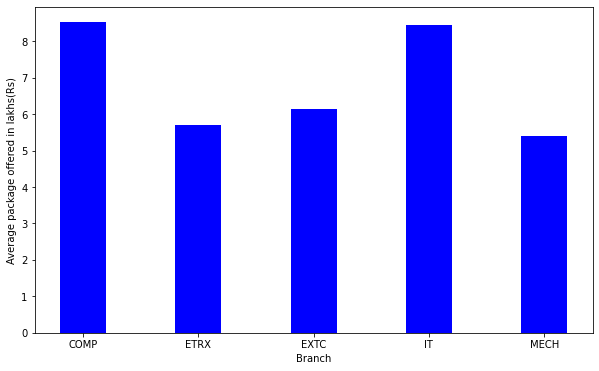

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(y,x,color='blue',width=0.4)
plt.xlabel('Branch')
plt.ylabel('Average package offered in lakhs(Rs)')

### Average package comparison w.r.t different branch

In [20]:
def avg_compare(a,b):
    p=100*(stat.mean(get_list(a))-stat.mean(get_list(b)))/stat.mean(get_list(b))
    if p>0:
        return print('Average package of '+str(a)+' is '+str(abs(round(p,2)))+'% more than '+str(b))
    else:
        return print('Average package of '+str(a)+' is '+str(abs(round(p,2)))+'% less than '+str(b))

In [21]:
avg_compare('COMP','ETRX')

Average package of COMP is 49.2% more than ETRX


In [22]:
avg_compare('ETRX','MECH')

Average package of ETRX is 5.59% more than MECH


### Distribution of students placed according to branch

In [23]:
print('Number of companies visited campus '+str(len(data['Company Name'].unique())))

Number of companies visited campus 115


In [25]:
data.shape

(578, 6)

In [26]:
y=[len(get_list("COMP")),len(get_list("ETRX")),len(get_list("EXTC")),len(get_list("IT")),len(get_list("MECH"))]
mylabels=['COMP','ETRX','EXTC','IT','MECH']

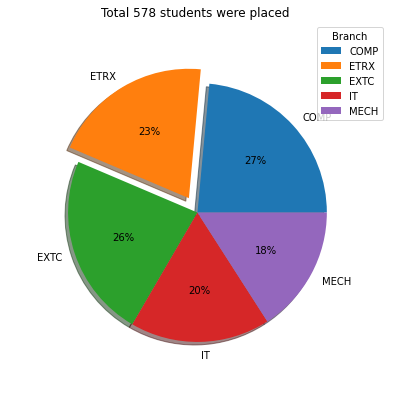

In [27]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(y, labels = mylabels,shadow=True,autopct=lambda p: str(round(p * len(data['Company Name'].unique()) / 100))+'%',radius=0.85,explode=(0,0.11,0,0,0))
ax.legend(title = "Branch")
ax.set_title("Total 578 students were placed ")
plt.show() 

### List of companies that took students from a particular branch

In [53]:
def get_companies(x):
    l=[]
    for i in range(578):
        if data.Branch[i]==x:
                l.append(data['Company Name'][i])
    return l

In [57]:
len(set(get_companies('ETRX')))

44